In [124]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def theta(x, y):
    return np.tanh(3 * (1 - 2*x)**2 - (1 - 3*y)**2)

def exact_solution(x, y):
    return theta(x, y)

def f_source(x, y):
    theta_val = theta(x, y)
    term = 6 - 72 * (4 * (1 - 2*x)**2 + (1 - 3*y)**2) * theta_val
    return term * (1 - theta_val**2)

def g0_bottom(x):
    return 6 * (1 - np.tanh(3 * (1 - 2*x)**2 - 1)**2)

def g1_top(x):
    return -12 * (1 - np.tanh(3 * (1 - 2*x)**2 - 4)**2)

def solve_poisson(nx, ny, max_iter=20000, tol=1e-12):
    hx = 1.0 / (nx - 1)
    hy = 1.0 / (ny - 1)
    
    x = np.linspace(0, 1, nx)
    y = np.linspace(0, 1, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    
    u = np.zeros((nx, ny))
    
    # Дирихле слева и справа
    u[0, :] = exact_solution(0, y)
    u[-1, :] = exact_solution(1, y)
    
    hx2 = hx * hx
    hy2 = hy * hy
    denominator = 2.0 / hx2 + 2.0 / hy2
    
    for iteration in range(max_iter):
        u_old = u.copy()
        
        u[1:-1, 1:-1] = (
            (u_old[:-2, 1:-1] + u_old[2:, 1:-1]) / hx2 +
            (u_old[1:-1, :-2] + u_old[1:-1, 2:]) / hy2 -
            f_source(X[1:-1, 1:-1], Y[1:-1, 1:-1])
        ) / denominator
        
        u[1:-1, 0]  = (4*u[1:-1, 1]  - u[1:-1, 2]  - 2*hy*g0_bottom(x[1:-1])) / 3
        u[1:-1, -1] = (4*u[1:-1, -2] - u[1:-1, -3] + 2*hy*g1_top(x[1:-1])) / 3
        
        max_diff = np.max(np.abs(u - u_old))
        if max_diff < tol:
            print(f"Converged after {iteration+1} iterations, max_diff = {max_diff:.2e}")
            break
    else:
        print(f"Warning: Did not converge after {max_iter} iterations, max_diff = {max_diff:.2e}")
    
    return X, Y, u


In [125]:
def calculate_error(X, Y, u_numeric):
    u_exact = exact_solution(X, Y)
    error = np.abs(u_numeric - u_exact)
    return u_exact, error

def plot_results(X, Y, u_numeric, u_exact, error):
    fig = plt.figure(figsize=(15, 5))
    
    ax1 = fig.add_subplot(131, projection='3d')
    surf1 = ax1.plot_surface(X, Y, u_numeric, cmap='viridis', alpha=0.8)
    ax1.set_title('Numerical Solution')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('u(x,y)')
    fig.colorbar(surf1, ax=ax1, shrink=0.5)
    
    ax2 = fig.add_subplot(132, projection='3d')
    surf2 = ax2.plot_surface(X, Y, u_exact, cmap='viridis', alpha=0.8)
    ax2.set_title('Exact Solution')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_zlabel('u(x,y)')
    fig.colorbar(surf2, ax=ax2, shrink=0.5)
    
    ax3 = fig.add_subplot(133, projection='3d')
    surf3 = ax3.plot_surface(X, Y, error, cmap='hot', alpha=0.8)
    ax3.set_title('Error')
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')
    ax3.set_zlabel('Error')
    fig.colorbar(surf3, ax=ax3, shrink=0.5)
    
    plt.tight_layout()
    plt.show()


Solving Poisson equation...
Converged after 12128 iterations, max_diff = 1.00e-12
Plotting results...


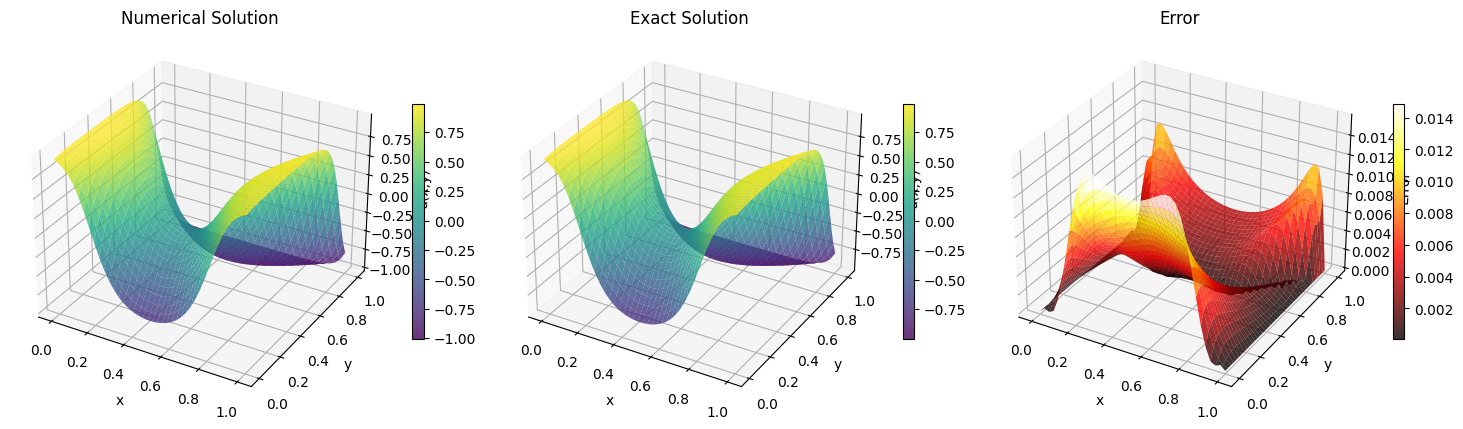

Checking convergence order...

Solving for n = 10
Converged after 740 iterations, max_diff = 9.70e-13
Max error: 3.13e-01

Solving for n = 20
Converged after 3083 iterations, max_diff = 9.97e-13
Max error: 6.56e-02

Solving for n = 40
Converged after 12128 iterations, max_diff = 1.00e-12
Max error: 1.58e-02

Solving for n = 80
Max error: 3.93e-03

Convergence order analysis:
Order between n=10 and n=20: 2.252
Order between n=20 and n=40: 2.054
Order between n=40 and n=80: 2.007


In [ ]:
def check_convergence_order():
    n_list = [10, 20, 40, 80]
    errors = []
    
    for n in n_list:
        print(f"\nSolving for n = {n}")
        X, Y, u_numeric = solve_poisson(n, n)
        u_exact, error = calculate_error(X, Y, u_numeric)
        max_error = np.max(error)
        errors.append(max_error)
        print(f"Max error: {max_error:.2e}")
    
    print("\nConvergence order analysis:")
    for i in range(1, len(errors)):
        p = np.log(errors[i-1] / errors[i]) / np.log(n_list[i] / n_list[i-1])
        print(f"Order between n={n_list[i-1]} and n={n_list[i]}: {p:.3f}")

def main():
    print("Solving Poisson equation...")
    X, Y, u_numeric = solve_poisson(40, 40)
    
    u_exact, error = calculate_error(X, Y, u_numeric)
    
    print("Plotting results...")
    plot_results(X, Y, u_numeric, u_exact, error)
    
    print("Checking convergence order...")
    check_convergence_order()

if __name__ == "__main__":
    main()